# Exploratory Data Analysis

This notebooks visualizes the data obtained from the data preprocessing notebook

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Load processed data
df = pd.read_csv('../data/processed/pleiades_gaia_features.csv', sep=',')

In [2]:
df.head(3)

,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,pmDE,Gmag,BPmag,RPmag,galactic_l,galactic_b,rel_e_Plx,distance,M_g,bp_rp,v_ra,v_dec,v_total
0,56.270012,23.281847,1.6016,0.3162,25.935,-14.649,18.914043,20.688047,17.706924,166.828899,-24.434632,0.197428,624.375624,9.936813,2.981123,76.755682,-43.354308,88.153450
1,56.273508,23.294099,2.2309,0.0893,24.736,-87.267,17.114810,18.152431,16.125580,166.822472,-24.423399,0.040029,448.249585,8.857211,2.026851,52.556654,-185.416460,192.721212
2,56.248320,23.314508,0.8100,0.0859,10.081,-30.797,15.802562,16.401548,15.021703,166.788594,-24.423814,0.106049,1234.567901,5.344987,1.379845,58.992519,-180.219481,189.629056


---

## Hertzsprung-Russel Diagram

The Hertzsprung-Russell (HR) diagram is a scatter plot that depicts the relationship between a star's brightness (luminosity) and its temperature. We will use it to identify different stellar populations.

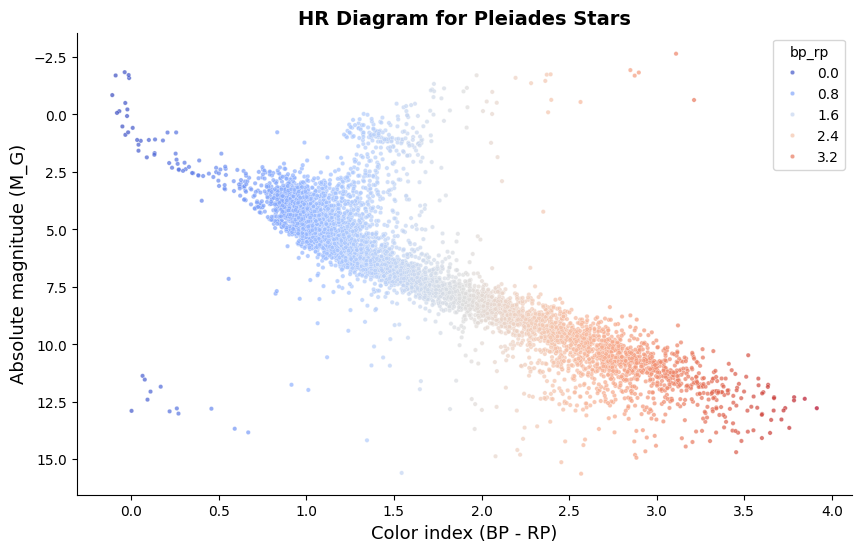

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data = df,
    x = 'bp_rp', 
    y = 'M_g',
    hue = 'bp_rp',
    palette = 'coolwarm',
    s = 10,
    alpha = 0.7,
)
plt.gca().invert_yaxis() # Bright stars at top
plt.xlabel('Color index (BP - RP)', fontsize=13)
plt.ylabel('Absolute magnitude (M_G)', fontsize=13)
plt.title('HR Diagram for Pleiades Stars', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/HR-diagram-pleiades', dpi=300)
plt.show()

**Interpretation:** The stars in the diagram tend to cluster along a diagonal line. The massive, hot blue stars are located in the upper-left, while the less massive, cooler red stars are found in the lower-right. There are a few outliers in the upper-right, which are likely not members of the Pleiades cluster. Additionally, there are some stars in the lower-left, which could be white dwarfs (though unlikely in the Pleiades), or they might represent photometric errors.

## Clustering with K-Means

The main goal is to identify distinct stellar groups using color index and absolute magnitude.

In [11]:
# We set a seed for reproducibility
seed = 123

In [10]:
# Features and scale
X = df[['M_g', 'bp_rp']].dropna()
X_scaled = StandardScaler().fit_transform(X)

In [12]:
# We will use the elbow method for clustering
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

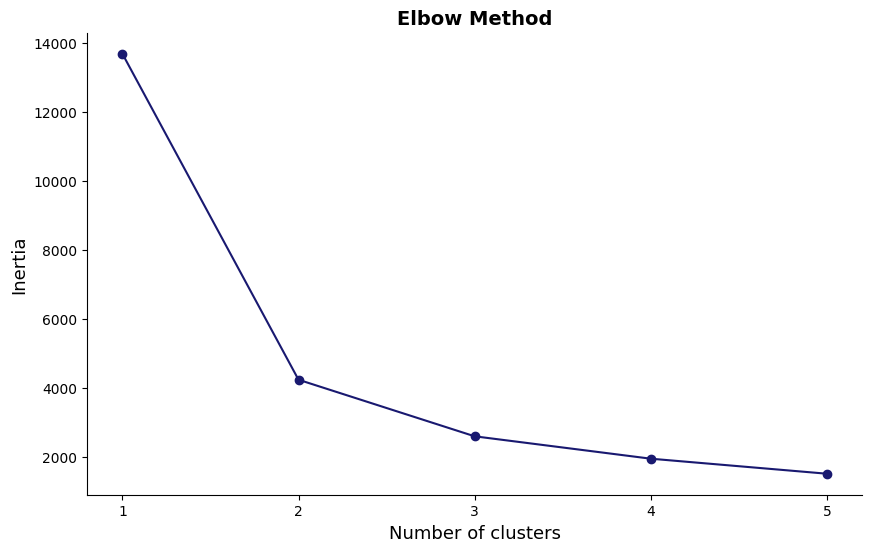

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertia, marker='o', color='midnightblue')
plt.xticks(range(1,6))
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.title('Elbow Method', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/k-means-elbow-method.png', dpi=300)
plt.show()

We can see that the inertia decreases significantly with three clusters; this is the elbow point.

**Optimal clusters:** `k=3`

In [24]:
# We apply K-means
kmeans = KMeans(n_clusters=3, random_state=seed)
df['cluster'] = kmeans.fit_predict(X_scaled)

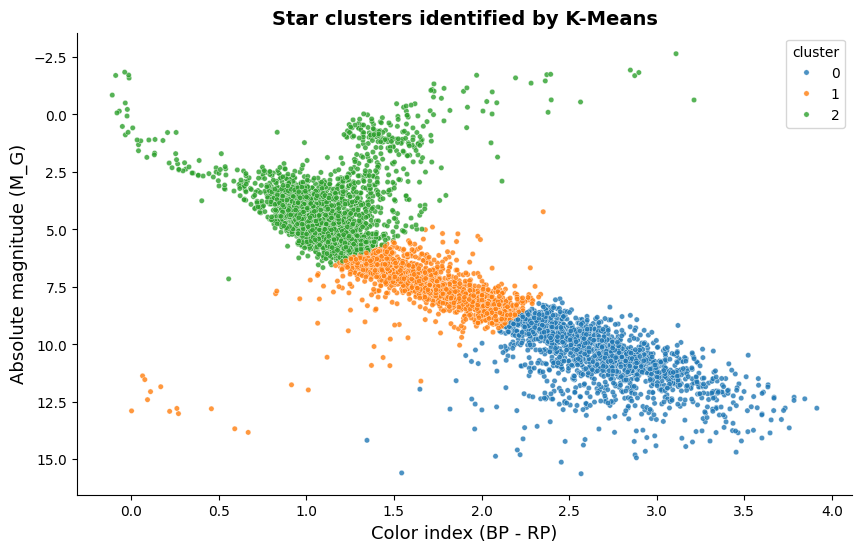

In [27]:
# We can visualize the clusters on HR diagram
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='bp_rp',
    y='M_g',
    hue='cluster',
    palette='tab10',
    s=15,
    alpha=0.8
)
plt.gca().invert_yaxis()
plt.xlabel('Color index (BP - RP)', fontsize=13)
plt.ylabel('Absolute magnitude (M_G)', fontsize=13)
plt.title("Star clusters identified by K-Means", fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/star-clusters-k-means.png', dpi=300)
plt.show()